In [1]:
# ======================================
# IMPORTACIÓN DE TODAS LAS LIBRERÍAS NECESARIAS
# ======================================

# Librerías básicas para manipulación de datos
import os
import pandas as pd
import numpy as np
import time
from random import gauss

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

# Librerías para análisis de valores perdidos
import missingno as msno

# Librerías de scikit-learn para imputación
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk

# Librería para imputación avanzada (MICE)
from fancyimpute import IterativeImputer

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

print("✅ Todas las librerías han sido importadas correctamente")
print("📊 Notebook preparado para tratamiento de valores perdidos")

✅ Todas las librerías han sido importadas correctamente
📊 Notebook preparado para tratamiento de valores perdidos


In [2]:
# ======================================
# INSTALACIÓN DE DEPENDENCIAS ADICIONALES
# ======================================

# Ejecutar solo si las librerías no están instaladas
import subprocess
import sys

def install_if_missing(package):
    try:
        __import__(package)
        print(f"✅ {package} ya está instalado")
    except ImportError:
        print(f"⚠️ Instalando {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} instalado correctamente")

# Lista de paquetes que podrían necesitar instalación
packages_to_check = [
    "missingno",
    "fancyimpute", 
    "plotly",
    "seaborn",
    "matplotlib"
]

print("🔍 Verificando dependencias...")
for package in packages_to_check:
    install_if_missing(package)
    
print("\n🎉 Todas las dependencias están listas para usar")

🔍 Verificando dependencias...
✅ missingno ya está instalado
✅ fancyimpute ya está instalado
✅ plotly ya está instalado
✅ seaborn ya está instalado
✅ matplotlib ya está instalado

🎉 Todas las dependencias están listas para usar


In [3]:
# ======================================
# CONFIGURACIÓN DEL ENTORNO Y VALIDACIÓN
# ======================================

# Configurar pandas para mostrar más información
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Configurar matplotlib para mejor visualización
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Verificar versiones de librerías importantes
print("📋 Versiones de librerías:")
print(f"  • pandas: {pd.__version__}")
print(f"  • numpy: {np.__version__}")
print(f"  • matplotlib: {plt.matplotlib.__version__}")
print(f"  • seaborn: {sns.__version__}")

try:
    import sklearn
    print(f"  • scikit-learn: {sklearn.__version__}")
except:
    print("  • scikit-learn: No disponible")

try:
    import plotly
    print(f"  • plotly: {plotly.__version__}")
except:
    print("  • plotly: No disponible")

try:
    import missingno
    print(f"  • missingno: Disponible")
except:
    print("  • missingno: No disponible")

print("\n🔧 Configuración del entorno completada")

📋 Versiones de librerías:
  • pandas: 2.3.0
  • numpy: 2.3.1
  • matplotlib: 3.10.3
  • seaborn: 0.13.2
  • scikit-learn: 1.7.0
  • plotly: 6.2.0
  • missingno: Disponible

🔧 Configuración del entorno completada


# Tratamiento de los valores perdidos

Cargamos los datos.

En esta ocasión cargamos los datos desde la carpeta /content/sample_data/ de Colab. Es necesario ubicar ahí el archivo `Ejemplo_valores_perdidos.csv`

In [7]:
import os
import pandas as pd
import numpy as np  # Asegúrate de importar numpy

# Función para cargar datos adaptada al entorno local
def cargar_datos():
    # Intentar cargar desde diferentes ubicaciones posibles
    rutas_posibles = [
        r"C:\Users\Dell\PyhtonIA\Pandas_Python_IA\Ejemplo_valores_perdidos.csv",
        "Ejemplo_valores_perdidos.csv",
        "/content/sample_data/Ejemplo_valores_perdidos.csv"  # Para compatibilidad con Colab
    ]
    
    for ruta in rutas_posibles:
        try:
            if os.path.exists(ruta):
                data = pd.read_csv(ruta)
                print(f"✅ Datos cargados desde: {ruta}")
                return data
        except Exception as e:
            continue
    
    # Si no se encuentra el archivo, crear datos de ejemplo
    print("⚠️ Archivo no encontrado. Creando datos de ejemplo...")
    np.random.seed(42)  # Para reproducibilidad
    
    # Crear dataset de ejemplo con valores perdidos
    n_rows = 1000
    dates = pd.date_range('2023-01-01', periods=n_rows, freq='H')
    
    data = pd.DataFrame({
        'date': dates.strftime('%d/%m/%Y %H:%M'),
        'temperatura': np.random.normal(20, 5, n_rows),
        'humedad': np.random.normal(60, 15, n_rows),
        'presion': np.random.normal(1013, 10, n_rows),
        'ws': np.random.exponential(5, n_rows),  # velocidad del viento
        'nox': np.random.exponential(30, n_rows),
        'pm10': np.random.exponential(25, n_rows)
    })
    
    # Introducir valores perdidos de manera aleatoria
    missing_cols = ['temperatura', 'humedad', 'presion', 'nox', 'pm10']
    for col in missing_cols:
        missing_indices = np.random.choice(data.index, size=int(0.1 * len(data)), replace=False)
        data.loc[missing_indices, col] = np.nan
    
    print("📊 Dataset de ejemplo creado con valores perdidos")
    print(f"📏 Dimensiones: {data.shape}")
    return data

data = cargar_datos()

✅ Datos cargados desde: C:\Users\Dell\PyhtonIA\Pandas_Python_IA\Ejemplo_valores_perdidos.csv


Necesitaremos una versión de scikit-learn superior a la que viene instalada en colab (1.2.2 -> 1.5.0)

In [2]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.8.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.23.0.

In [ ]:
# Desinstalar scikit-learn
# !pip uninstall -y scikit-learn

# Instalar una versión específica de scikit-learn
# !pip install scikit-learn==1.5.0

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 56.2 MB/s eta 0:00:00


## Visualización de los datos

Lo primero que debemos hacer es visualizar los datos

In [3]:
data

date    ws     wd    nox    no2    o3  pm10     so2  \
0      01/01/1998 00:00  0.60  280.0  285.0   39.0   1.0  29.0  4.7225   
1      01/01/1998 01:00  2.16  230.0    NaN    NaN   NaN  37.0     NaN   
2      01/01/1998 02:00  2.76  190.0    NaN    NaN   3.0  34.0  6.8300   
3      01/01/1998 03:00  2.16  170.0  493.0   52.0   3.0  35.0  7.6625   
4      01/01/1998 04:00  2.40  180.0  468.0   78.0   2.0  34.0  8.0700   
...                 ...   ...    ...    ...    ...   ...   ...     ...   
65528  23/06/2005 08:00  1.50  260.0  388.0  145.0   6.0  48.0     NaN   
65529  23/06/2005 09:00  1.50  210.0  404.0  168.0   7.0  58.0     NaN   
65530  23/06/2005 10:00  2.60  240.0  387.0  175.0  10.0  55.0     NaN   
65531  23/06/2005 11:00  3.10  220.0  312.0  125.0  15.0  52.0     NaN   
65532  23/06/2005 12:00  3.10  220.0  287.0  119.0  17.0  55.0     NaN   

              co  pm25  
0       3.372500   NaN  
1            NaN   NaN  
2       9.602500   NaN  
3      10.217500   NaN  
4       8.912500   NaN  
...          ...   ...  
65528   1.637931  26.0  
65529   1.293103  34.0  
65530   1.293103  34.0  
65531   1.293103  33.0  
65532   1.293103  35.0  

[65533 rows x 10 columns]

Tambien podemos visualizar un numero determinado para mayor comodidad

In [4]:
data.head(n=10)

date    ws     wd    nox   no2   o3  pm10     so2       co  \
0  01/01/1998 00:00  0.60  280.0  285.0  39.0  1.0  29.0  4.7225   3.3725   
1  01/01/1998 01:00  2.16  230.0    NaN   NaN  NaN  37.0     NaN      NaN   
2  01/01/1998 02:00  2.76  190.0    NaN   NaN  3.0  34.0  6.8300   9.6025   
3  01/01/1998 03:00  2.16  170.0  493.0  52.0  3.0  35.0  7.6625  10.2175   
4  01/01/1998 04:00  2.40  180.0  468.0  78.0  2.0  34.0  8.0700   8.9125   
5  01/01/1998 05:00  3.00  190.0  264.0  42.0  0.0  16.0  5.5050   3.0525   
6  01/01/1998 06:00  3.00  140.0  171.0  38.0  0.0  11.0  4.2300   2.2650   
7  01/01/1998 07:00  3.00  170.0  195.0  51.0  0.0  12.0  3.8750   1.9950   
8  01/01/1998 08:00  3.36  170.0  137.0  42.0  1.0  12.0  3.3475   1.4550   
9  01/01/1998 09:00  3.96  170.0  113.0  39.0  2.0  12.0  2.9225   1.2050   

   pm25  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  
5   NaN  
6   NaN  
7   NaN  
8   NaN  
9   NaN

Tambien tenemos la opcion de realizar un "resumen estadistico" de cada una de las variables.

In [5]:
data.describe()

ws            wd           nox           no2            o3  \
count  64907.000000  65314.000000  63110.000000  63095.000000  62947.000000   
mean       4.488275    200.027100    178.798558     49.129757      7.122150   
std        2.398349     94.457268    121.515278     22.638220      7.539047   
min       -0.240000      0.000000      0.000000      0.000000     -1.000000   
25%        2.600000    140.000000     82.000000     33.000000      2.000000   
50%        4.100000    210.000000    153.000000     46.000000      4.000000   
75%        5.760000    270.000000    249.000000     61.000000     10.000000   
max       20.160000    360.000000   1144.000000    206.000000     70.000000   

               pm10           so2            co          pm25  
count  63372.000000  55499.000000  63604.000000  56759.000000  
mean      34.381856      4.754911      1.463840     21.695343  
std       20.467023      3.648367      1.120033     12.637921  
min       -1.000000     -2.167474     -0.033333     -1.000000  
25%       22.000000      2.103333      0.634583     13.000000  
50%       31.000000      4.000000      1.140000     20.000000  
75%       44.000000      6.500000      1.980000     28.000000  
max      801.000000     63.205000     19.705000    398.000000

Todas las variables son de tipo numérico

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65533 entries, 0 to 65532
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    65533 non-null  object 
 1   ws      64907 non-null  float64
 2   wd      65314 non-null  float64
 3   nox     63110 non-null  float64
 4   no2     63095 non-null  float64
 5   o3      62947 non-null  float64
 6   pm10    63372 non-null  float64
 7   so2     55499 non-null  float64
 8   co      63604 non-null  float64
 9   pm25    56759 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.0+ MB


Una vez conocidos nuestros datos procedemos a analizar su completitud.<br>
Tenemos que saber cuantos valores perdidos tenemos de cada variable antes de tomar una decision sobre como proceder.

La función `isnull()` nos devuelve un Dataframe con las mismas filas y columnas que el original, pero en las celdas tenemos el valor booleano que nos informa de si en esa posición hay almacenado o no un valor perdido.

In [7]:
data.isnull()
# data.notna()

date     ws     wd    nox    no2     o3   pm10    so2     co   pm25
0      False  False  False  False  False  False  False  False  False   True
1      False  False  False   True   True   True  False   True   True   True
2      False  False  False   True   True  False  False  False  False   True
3      False  False  False  False  False  False  False  False  False   True
4      False  False  False  False  False  False  False  False  False   True
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
65528  False  False  False  False  False  False  False   True  False  False
65529  False  False  False  False  False  False  False   True  False  False
65530  False  False  False  False  False  False  False   True  False  False
65531  False  False  False  False  False  False  False   True  False  False
65532  False  False  False  False  False  False  False   True  False  False

[65533 rows x 10 columns]

La función `sum()` nos hace una primera suma por columnas, de manera que sabemos cuántos valores perdidos hay en cada variable a estudiar.

In [ ]:
data.isnull().sum()

date        0
ws        626
wd        219
nox      2423
no2      2438
o3       2586
pm10     2161
so2     10034
co       1929
pm25     8774
dtype: int64

Otra opcion es calcular el porcentaje respecto al número de registros totales, que siempre es más representativo.

In [ ]:
data.shape

(65533, 10)

In [ ]:
print("Porcentajes de valores perdidos por cada variable:")
data.isnull().sum()/len(data.index)*100

Porcentajes de valores perdidos por cada variable:


date     0.000000
ws       0.955244
wd       0.334183
nox      3.697374
no2      3.720263
o3       3.946103
pm10     3.297575
so2     15.311370
co       2.943555
pm25    13.388674
dtype: float64

## Análisis gráfico de los valores perdidos

El análisis gráfico de valores perdidos es una parte crucial del proceso de exploración de datos y limpieza de datos. Aquí hay algunas herramientas y técnicas que puedes utilizar para analizar gráficamente los valores perdidos en tus conjuntos de datos:

### Diagrama de barras de valores perdidos

Muestra la cantidad de valores perdidos en cada columna.<br>
Es igual que cuando representamos las categorías en una variable categórica. De hecho, usa el mismo código.

In [ ]:
import matplotlib.pyplot as plt

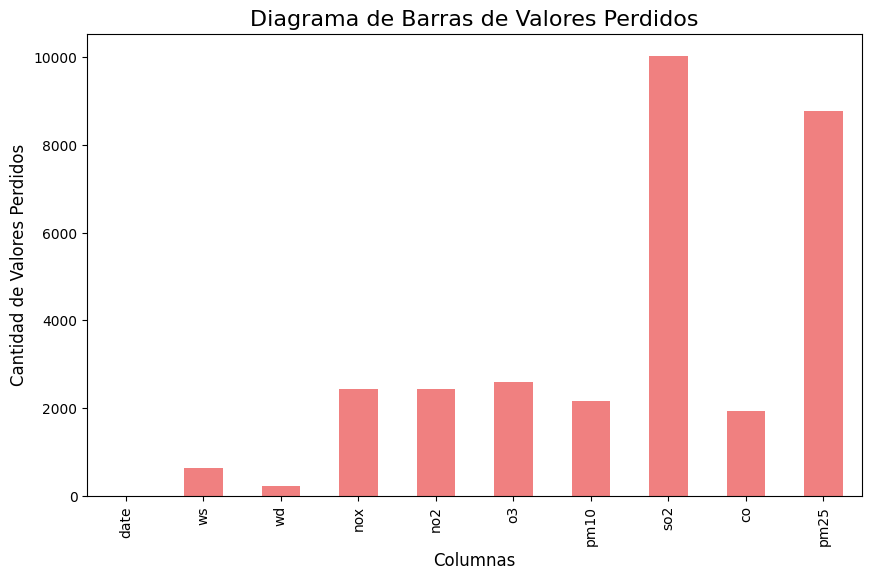

In [ ]:
# Calcular la cantidad de valores perdidos por columna
missing_values = data.isnull().sum()

# Visualizar el diagrama de barras de valores perdidos
plt.figure(figsize=(10, 6))
# Es el mismo tipo de gráfico que hemos usado para ver los valores únicos de las columnas categóricas
missing_values.plot(kind='bar', color='lightcoral')
plt.title('Diagrama de Barras de Valores Perdidos', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Valores Perdidos', fontsize=12)
plt.show()

### Matriz de valores perdidos

Una matriz de valores perdidos es una representación gráfica de los valores perdidos en tu conjunto de datos.<br>
Utiliza la biblioteca `missingno` en Python para crear una matriz de valores perdidos.

En caso de no encontrarlo instalado (En Colab lo está) ejecutal esta línea de código<br>`%pip install missingno`

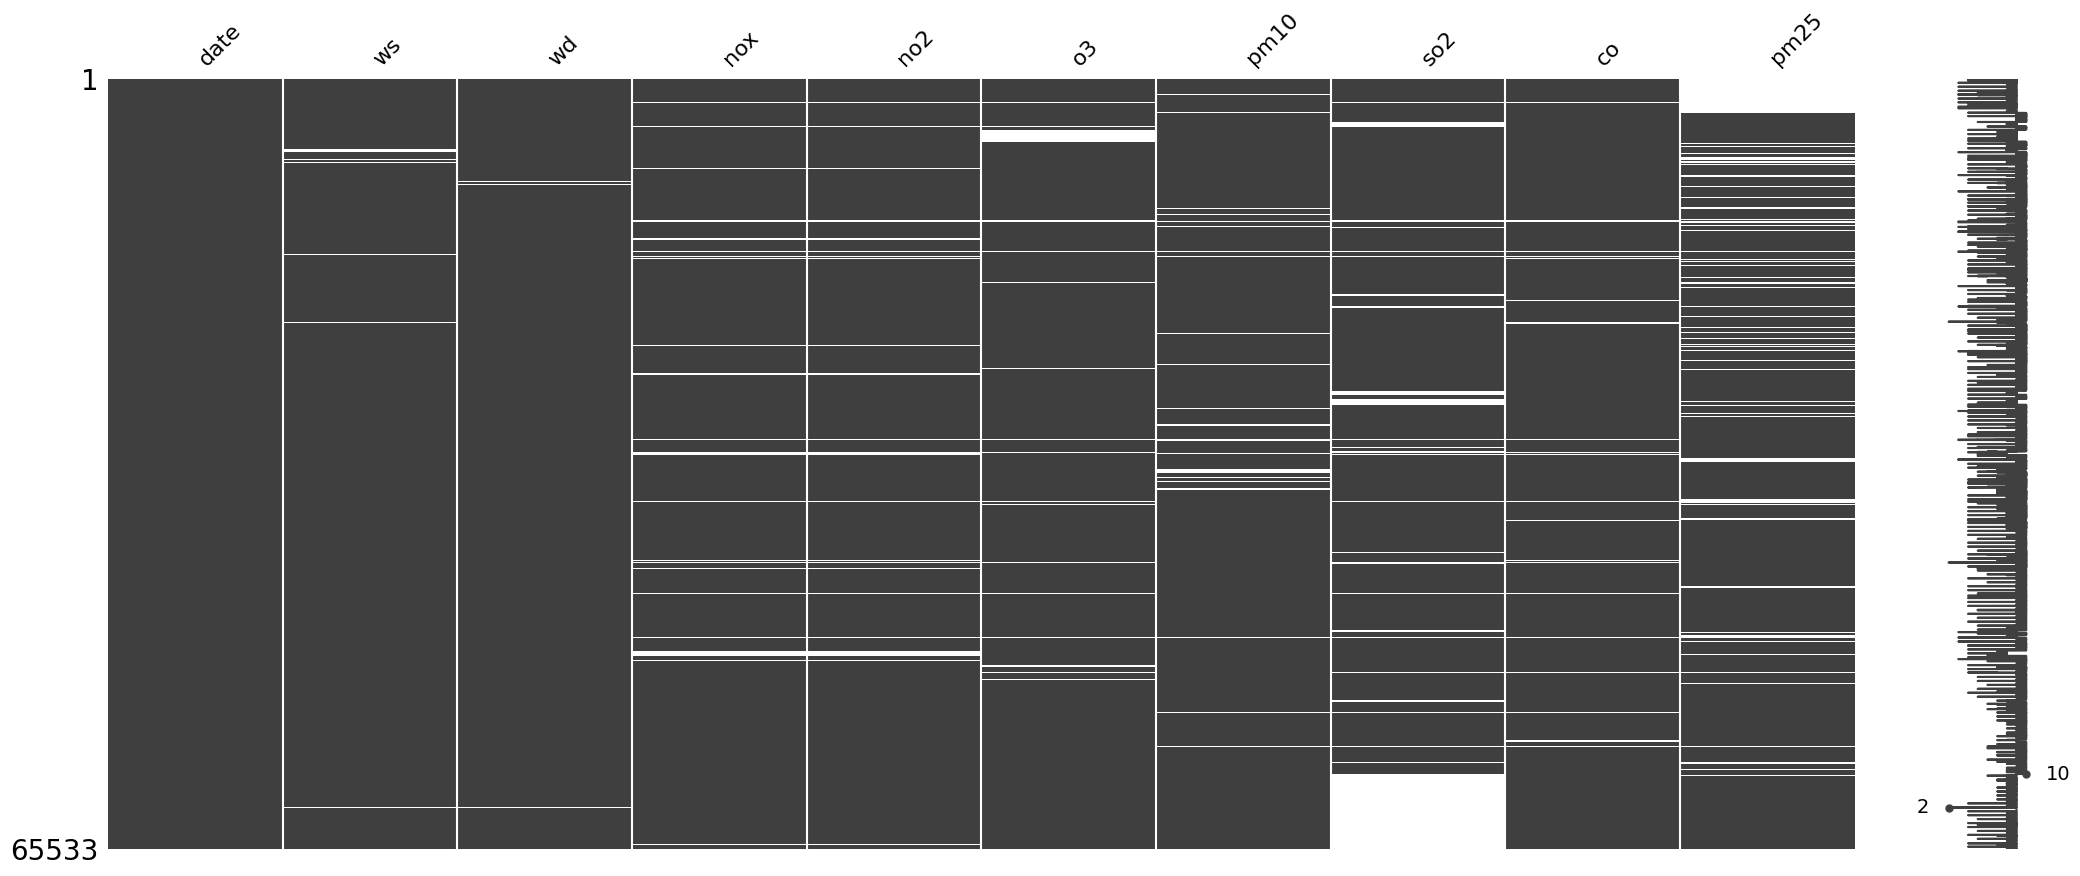

In [ ]:
import missingno as msno
msno.matrix(data);

Se puede obtener un diagrama análogo con la librería `seaborn`

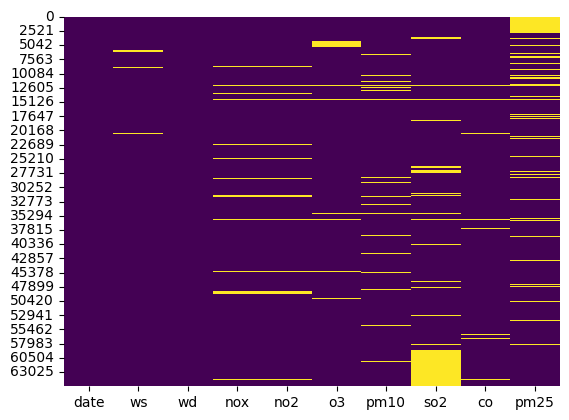

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='viridis');

### Mapa de calor de correlación de valores perdidos

Muestra la correlación entre las columnas con valores perdidos. Permite identificar patrones de valores perdidos que se producen juntos.<br>
Utiliza la función `heatmap` de la librería `seaborn` en Python.

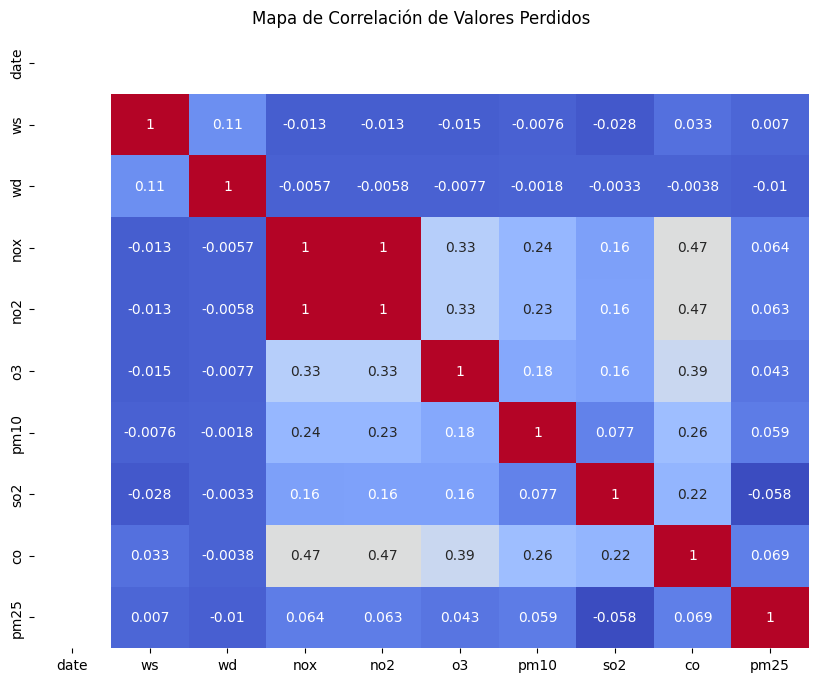

In [ ]:
# Crear un DataFrame booleano que indique la presencia de valores perdidos
missing_data = data.isnull()

# Crear un mapa de calor de la correlación entre columnas con valores perdidos
plt.figure(figsize=(10, 8))
sns.heatmap(missing_data.corr(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Mapa de Correlación de Valores Perdidos')
plt.show()

## Eliminación de los registros con valores perdidos

La primera opcion es borrar todas las filas que contengan algun dato perdido.

Esta es la opcion menos adecuada ya que supone una importante perdida de infomacion.

Es especialmente desaconsejable en casos como este, en el que tenemos una serie temporal, ya que la eliminación de filas supone la destrucción de la frecuencia de la columna/índice de tiempos

Una vez eliminados los datos, los visualizamos

In [ ]:
datos_completos = data.dropna()
print(datos_completos)

                   date   ws     wd    nox    no2    o3  pm10       so2  \
2887   01/05/1998 07:00  3.6  350.0   81.0   37.0  13.0  24.0  2.897500   
2888   01/05/1998 08:00  3.6  350.0  107.0   43.0  12.0  23.0  3.132500   
2889   01/05/1998 09:00  3.6  340.0  127.0   34.0  11.0  21.0  3.100000   
2890   01/05/1998 10:00  3.0  350.0  122.0   50.0  10.0  23.0  3.237500   
2891   01/05/1998 11:00  3.6  350.0  115.0   37.0  12.0  25.0  3.235000   
...                 ...  ...    ...    ...    ...   ...   ...       ...   
59148  30/09/2004 12:00  4.6  240.0  467.0  120.0   1.0  59.0  6.987676   
59149  30/09/2004 13:00  5.2  240.0  467.0  124.0   1.0  74.0  7.375880   
59150  30/09/2004 14:00  4.6  240.0  421.0  126.0   2.0  60.0  6.534771   
59151  30/09/2004 15:00  4.6  240.0  414.0  113.0   2.0  56.0  6.470070   
59152  30/09/2004 16:00  4.6  250.0  370.0  106.0   1.0  54.0  6.081866   

             co  pm25  
2887   0.810000  16.0  
2888   0.910000  16.0  
2889   1.185000  15.0  
289

Con esta funcion vemos si existen (TRUE) o no (FALSE) datos perdidos

In [ ]:
print(datos_completos.isnull().any())

date    False
ws      False
wd      False
nox     False
no2     False
o3      False
pm10    False
so2     False
co      False
pm25    False
dtype: bool


Vemos cómo hemos perdido gran cantidad de filas.

In [ ]:
print("Longitud de la tabla resultante (Número de observaciones):", len(datos_completos))
porcentaje = round(100*len(datos_completos)/len(data),2)
print(f"Representa un {porcentaje} % del total")

Longitud de la tabla resultante (Número de observaciones): 42892
Representa un 65.45 % del total


Y, lo que es más importante en este caso, la columna `date` ha perdido su frecuencia.

En la serie original veo una frecuencia horaria:

In [ ]:
serie_sin_interrupciones = pd.to_datetime(data["date"], format = "%d/%m/%Y %H:%M")
serie_sin_interrupciones.dt.freq

'h'

Mientras que en la "limpiada" de valores perdidos ya no puedo inferir la frecuencia

In [ ]:
serie_con_interrupciones = pd.to_datetime(datos_completos["date"], format = "%d/%m/%Y %H:%M")
print(serie_con_interrupciones.dt.freq)

None


## Imputación de los valores perdidos

La opcion de eliminar los datos, como hemos dicho, nos lleva a perder informacion que puede ser relevante.

Otra opción es imputar un valor a esas casillas vacías.
Existen varias opciones para imputar los datos.

Volvemos a cargar los datos originales.

In [ ]:
data = cargar_datos()

In [ ]:
# Me aseguro de que haya valores perdidos
data.isnull().any()

date    False
ws       True
wd       True
nox      True
no2      True
o3       True
pm10     True
so2      True
co       True
pm25     True
dtype: bool

In [ ]:
data.describe().T

count        mean         std       min         25%     50%     75%  \
ws    64907.0    4.488275    2.398349 -0.240000    2.600000    4.10    5.76   
wd    65314.0  200.027100   94.457268  0.000000  140.000000  210.00  270.00   
nox   63110.0  178.798558  121.515278  0.000000   82.000000  153.00  249.00   
no2   63095.0   49.129757   22.638220  0.000000   33.000000   46.00   61.00   
o3    62947.0    7.122150    7.539047 -1.000000    2.000000    4.00   10.00   
pm10  63372.0   34.381856   20.467023 -1.000000   22.000000   31.00   44.00   
so2   55499.0    4.754911    3.648367 -2.167474    2.103333    4.00    6.50   
co    63604.0    1.463840    1.120033 -0.033333    0.634583    1.14    1.98   
pm25  56759.0   21.695343   12.637921 -1.000000   13.000000   20.00   28.00   

           max  
ws      20.160  
wd     360.000  
nox   1144.000  
no2    206.000  
o3      70.000  
pm10   801.000  
so2     63.205  
co      19.705  
pm25   398.000

### Método `fillna`

El metodo de imputacion mas sencillo es utilizar el método `fillna` para "rellenar los huecos" con el valor que yo quiera.

Puedo rellenar con un valor constante

In [ ]:
data_rellenado = data.fillna(0)

Pero eso, naturalmente, tiene un efecto en la distribución de las variables numéricas.

In [ ]:
comparacion = pd.DataFrame({"std_original" : data.describe().T["std"],
                            "std_rellenado" : data_rellenado.describe().T["std"],
                            "mean_original" : data.describe().T["mean"],
                            "mean_rellenado" : data_rellenado.describe().T["mean"]})
comparacion

std_original  std_rellenado  mean_original  mean_rellenado
ws        2.398349       2.426463       4.488275        4.445401
wd       94.457268      95.003280     200.027100      199.358644
nox     121.515278     123.928714     178.798558      172.187707
no2      22.638220      24.080711      49.129757       47.302001
o3        7.539047       7.517781       7.122150        6.841103
pm10     20.467023      21.042374      34.381856       33.248089
so2       3.648367       3.768858       4.754911        4.026869
co        1.120033       1.130825       1.463840        1.420751
pm25     12.637921      13.889386      21.695343       18.790625

Por ello suele usarse en variables categóricas para introducir categorías del tipo "Sin_datos".

```
# Convertir la columna a categorica
data['columna'] = data['columna'].astype('category')

# Reemplazar los valores perdidos con "Sin_datos"
data['columna'].fillna('Sin_datos', inplace=True)

```

Podemos reducir el problema si asignamos a los valores perdidos la media de cada columna

In [ ]:
data.mean(numeric_only=True)

ws        4.488275
wd      200.027100
nox     178.798558
no2      49.129757
o3        7.122150
pm10     34.381856
so2       4.754911
co        1.463840
pm25     21.695343
dtype: float64

Vemos cómo `fillna` es capaz de recibir un objeto Series y hacer la asignación con un valor distinto a cada variable numérica.

In [ ]:
data_rellenado = data.fillna(data.mean(numeric_only=True))

Ahora la media permanece y la desviación (y el resto de medidas de dispersión) disminuye

In [ ]:
comparacion = pd.DataFrame({"std_original" : data.describe().T["std"],
                            "std_rellenado" : data_rellenado.describe().T["std"],
                            "mean_original" : data.describe().T["mean"],
                            "mean_rellenado" : data_rellenado.describe().T["mean"]})
comparacion

std_original  std_rellenado  mean_original  mean_rellenado
ws        2.398349       2.386866       4.488275        4.488275
wd       94.457268      94.299304     200.027100      200.027100
nox     121.515278     119.247648     178.798558      178.798558
no2      22.638220      22.213122      49.129757       49.129757
o3        7.539047       7.388798       7.122150        7.122150
pm10     20.467023      20.126731      34.381856       34.381856
so2       3.648367       3.357457       4.754911        4.754911
co        1.120033       1.103425       1.463840        1.463840
pm25     12.637921      11.761493      21.695343       21.695343

Procedemos a comprobar que no existen valores perdidos

In [ ]:
data_rellenado.isnull().any()

date    False
ws      False
wd      False
nox     False
no2     False
o3      False
pm10    False
so2     False
co      False
pm25    False
dtype: bool

## Simple Imputer

Volvemos a cargar los datos

In [ ]:
data = cargar_datos()

In [ ]:
# Comprobamos que hay valores perdidos nuevamente
data.isnull().any().any()

np.True_

En esta ocasión vamos a seleccionar las columnas que son numéricas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65533 entries, 0 to 65532
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    65533 non-null  object 
 1   ws      64907 non-null  float64
 2   wd      65314 non-null  float64
 3   nox     63110 non-null  float64
 4   no2     63095 non-null  float64
 5   o3      62947 non-null  float64
 6   pm10    63372 non-null  float64
 7   so2     55499 non-null  float64
 8   co      63604 non-null  float64
 9   pm25    56759 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.0+ MB


Vamos a seleccionar las columnas numéricas. Algunos métodos de imputación generan error al intentar pasarles columnas no numéricas

In [ ]:
datoNum = data.select_dtypes(include='number')

# o bien:
# import numpy as np
# datoNum = data.select_dtypes(include=np.number)

In [ ]:
data.columns.difference(datoNum.columns)

Index(['date'], dtype='object')

In [ ]:
datoNum.columns

Index(['ws', 'wd', 'nox', 'no2', 'o3', 'pm10', 'so2', 'co', 'pm25'], dtype='object')

Ha quedado excluida la fecha, la guardamos en una variable y la concatenaremos después para mantener la integridad de los datos.

In [ ]:
fecha = pd.to_datetime(data["date"], format = "%d/%m/%Y %H:%M")

In [ ]:
fecha

0       1998-01-01 00:00:00
1       1998-01-01 01:00:00
2       1998-01-01 02:00:00
3       1998-01-01 03:00:00
4       1998-01-01 04:00:00
                ...        
65528   2005-06-23 08:00:00
65529   2005-06-23 09:00:00
65530   2005-06-23 10:00:00
65531   2005-06-23 11:00:00
65532   2005-06-23 12:00:00
Name: date, Length: 65533, dtype: datetime64[ns]

Vamos a utilizar la clase **SimpleImputer** de la biblioteca scikit-learn para imputar valores faltantes. El método `impute()` del objeto **SimpleImputer** reemplaza los valores faltantes en los datos utilizando la estrategia especificada en el parámetro strategy.

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

Instalación si fuera necesario: `pip install scikit-learn`

Aquí están los valores posibles que puede tener el parámetro strategy:

`mean`: Remplaza los valores faltantes con la media de la columna.<br>
`median`: Remplaza los valores faltantes con la mediana de la columna.<br>
`most_frequent`: Remplaza los valores faltantes con el valor más frecuente en la columna.<br>
`constant`: Remplaza los valores faltantes con un valor constante, que debe ser especificado en el parámetro `fill_value`.<br>


Para especificar una estrategia diferente, simplemente cambiaremos `mean` por la estrategia deseada en la línea de código que crea el objeto **SimpleImputer**.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk

# Imputar la media
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
datoNum_imputed = imp.fit_transform(datoNum)

# Convertir el resultado de nuevo a DataFrame
datoNum_imputed_df = pd.DataFrame(datoNum_imputed, columns=datoNum.columns)

# Concatenar fecha y datos imputados
datos_completos = pd.concat([fecha, datoNum_imputed_df], axis=1)

In [ ]:
datos_completos

date    ws     wd         nox         no2        o3  \
0     1998-01-01 00:00:00  0.60  280.0  285.000000   39.000000   1.00000   
1     1998-01-01 01:00:00  2.16  230.0  178.798558   49.129757   7.12215   
2     1998-01-01 02:00:00  2.76  190.0  178.798558   49.129757   3.00000   
3     1998-01-01 03:00:00  2.16  170.0  493.000000   52.000000   3.00000   
4     1998-01-01 04:00:00  2.40  180.0  468.000000   78.000000   2.00000   
...                   ...   ...    ...         ...         ...       ...   
65528 2005-06-23 08:00:00  1.50  260.0  388.000000  145.000000   6.00000   
65529 2005-06-23 09:00:00  1.50  210.0  404.000000  168.000000   7.00000   
65530 2005-06-23 10:00:00  2.60  240.0  387.000000  175.000000  10.00000   
65531 2005-06-23 11:00:00  3.10  220.0  312.000000  125.000000  15.00000   
65532 2005-06-23 12:00:00  3.10  220.0  287.000000  119.000000  17.00000   

       pm10       so2         co       pm25  
0      29.0  4.722500   3.372500  21.695343  
1      37.0  4.754911   1.463840  21.695343  
2      34.0  6.830000   9.602500  21.695343  
3      35.0  7.662500  10.217500  21.695343  
4      34.0  8.070000   8.912500  21.695343  
...     ...       ...        ...        ...  
65528  48.0  4.754911   1.637931  26.000000  
65529  58.0  4.754911   1.293103  34.000000  
65530  55.0  4.754911   1.293103  34.000000  
65531  52.0  4.754911   1.293103  33.000000  
65532  55.0  4.754911   1.293103  35.000000  

[65533 rows x 10 columns]

In [ ]:
# Nos aseguramos de que no haya valores perdidos.
datos_completos.isnull().any().any()

np.False_

Las opciones de usar la moda o valor mas frecuente dentro de la imputacion por valores fijos son más habituales con las columnas categóricas que con las numéricas.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk

# Imputar la media
imp = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
datoNum_imputed = imp.fit_transform(datoNum)

# Convertir el resultado de nuevo a DataFrame
datoNum_imputed_df = pd.DataFrame(datoNum_imputed, columns=datoNum.columns)

# Concatenar fecha y datos imputados
datos_completos = pd.concat([fecha, datoNum_imputed_df], axis=1)

In [ ]:
# Nos aseguramos de que no haya valores perdidos.
datos_completos.isnull().any().any()

np.False_

### `Simple Imputer` con estrategia personalizada

La opción `strategy` puede ser una función personalizada.

> Requiere scikit-learn 1.5.0

Al igual que ocurre con las funciones de agregación, la función **debe devolver un único valor** calculado a partir de los valores de una serie (que recibe como parámetro). Puede ser una función anónima.

In [ ]:
from random import gauss
def mi_estrategia(serie):
    std_serie = serie.std()
    media_serie = serie.mean()
    return gauss(media_serie, std_serie)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk

# Imputar la media
imp = SimpleImputer(missing_values=np.nan, strategy = mi_estrategia)
datoNum_imputed = imp.fit_transform(datoNum)

# Convertir el resultado de nuevo a DataFrame
datoNum_imputed_df = pd.DataFrame(datoNum_imputed, columns=datoNum.columns)

# Concatenar fecha y datos imputados
datos_completos = pd.concat([fecha, datoNum_imputed_df], axis=1)

In [ ]:
datos_completos

date    ws     wd         nox         no2         o3  \
0     1998-01-01 00:00:00  0.60  280.0  285.000000   39.000000   1.000000   
1     1998-01-01 01:00:00  2.16  230.0  139.588755   17.744347   7.323427   
2     1998-01-01 02:00:00  2.76  190.0  139.588755   17.744347   3.000000   
3     1998-01-01 03:00:00  2.16  170.0  493.000000   52.000000   3.000000   
4     1998-01-01 04:00:00  2.40  180.0  468.000000   78.000000   2.000000   
...                   ...   ...    ...         ...         ...        ...   
65528 2005-06-23 08:00:00  1.50  260.0  388.000000  145.000000   6.000000   
65529 2005-06-23 09:00:00  1.50  210.0  404.000000  168.000000   7.000000   
65530 2005-06-23 10:00:00  2.60  240.0  387.000000  175.000000  10.000000   
65531 2005-06-23 11:00:00  3.10  220.0  312.000000  125.000000  15.000000   
65532 2005-06-23 12:00:00  3.10  220.0  287.000000  119.000000  17.000000   

       pm10     so2         co       pm25  
0      29.0  4.7225   3.372500  36.973331  
1      37.0  7.0646   0.522074  36.973331  
2      34.0  6.8300   9.602500  36.973331  
3      35.0  7.6625  10.217500  36.973331  
4      34.0  8.0700   8.912500  36.973331  
...     ...     ...        ...        ...  
65528  48.0  7.0646   1.637931  26.000000  
65529  58.0  7.0646   1.293103  34.000000  
65530  55.0  7.0646   1.293103  34.000000  
65531  52.0  7.0646   1.293103  33.000000  
65532  55.0  7.0646   1.293103  35.000000  

[65533 rows x 10 columns]

In [ ]:
# Nos aseguramos de que no haya valores perdidos.
datos_completos.isnull().any().any()

np.False_

In [ ]:
comparacion = pd.DataFrame({"std_original" : data.describe().T["std"],
                            "std_rellenado" : datos_completos.describe().T["std"],
                            "mean_original" : data.describe().T["mean"],
                            "mean_rellenado" : datos_completos.describe().T["mean"]})
comparacion

std_original std_rellenado  mean_original       mean_rellenado
co        1.120033      1.114848       1.463840             1.436118
date           NaN           NaN            NaN  2001-09-27 06:00:00
no2      22.638220     22.993613      49.129757            47.962137
nox     121.515278    119.476962     178.798558           177.348825
o3        7.539047      7.388902       7.122150             7.130093
pm10     20.467023     20.143681      34.381856            34.534419
pm25     12.637921     12.860809      21.695343            23.740863
so2       3.648367      3.458941       4.754911             5.108556
wd       94.457268     94.335197     200.027100            200.17777
ws        2.398349      2.386981       4.488275             4.485977

Todas estas imputaciones se están realizando de manera que **a todos los valores perdidos se les asigna el mismo valor**

En ocasiones es mas acertado utilizar otros metodos, especialmente si las variables estan relacionadas entre si.

Supongamos que existe una relación aproximada entre la velocidad del viento y los demás contaminantes. A más viento menos contaminantes. Podría crear una estategia de relleno de valores faltantes que utilice esas dos columnas.

In [ ]:
data = cargar_datos()

In [ ]:
datoNum = data.select_dtypes(include='number')

In [ ]:
"""
def mi_estrategia(serie, ws):
    razon_serie_vs_viento = (serie * ws).mean()
    for indice in range(len(serie)):
        viento = ws.iloc[indice]
        valor = serie.iloc[indice]
        if np.isnan(valor) and not np.isnan(viento) and (viento !=0):
            serie.iloc[indice] = razon_serie_vs_viento / viento
    return serie

"""
# Usando una máscara esto es mucho más eficiente
def mi_estrategia(serie, ws):
    # Calcular la razón serie vs viento
    razon_serie_vs_viento = (serie * ws).mean()

    # Crear una máscara para identificar los valores de 'serie' que son NaN y 'ws' que no son NaN
    mask = serie.isna() & ws.notna() & ws != 0

    # Asignar el valor de 'razon_serie_vs_viento' a los elementos de 'serie' que cumplan con la condición de la máscara
    serie[mask] = razon_serie_vs_viento / ws

    return serie


In [ ]:
# Aplicar la estrategia personalizada
import time

inicio = time.perf_counter()

for col in datoNum.columns:
    serie = datoNum[col]
    datoNum[col] = mi_estrategia(serie, data["ws"])

final = time.perf_counter()

print(f'Tiempo de ejecución {round(final-inicio, 5)} segundos')

Tiempo de ejecución 0.0679 segundos


*Con `apply` pasa de tardar 19 segundos a tardar 7*

In [ ]:
import time

inicio = time.perf_counter()

datoNum.apply(lambda col: mi_estrategia(col, data["ws"]))

final = time.perf_counter()

print(f'Tiempo de ejecución {round(final-inicio, 5)} segundos')

Tiempo de ejecución 0.06108 segundos


In [ ]:
# Verificar si hay valores faltantes aún
print(data.isnull().sum(), "\n", datoNum.isnull().sum())

date        0
ws        626
wd        219
nox      2423
no2      2438
o3       2586
pm10     2161
so2     10034
co       1929
pm25     8774
dtype: int64 
 ws        626
wd        219
nox      2423
no2      2438
o3       2586
pm10     2161
so2     10034
co       1929
pm25     8774
dtype: int64


In [ ]:
# Concatenar fecha y datos imputados
datos_completos = pd.concat([fecha, datoNum], axis=1)
datos_completos

date    ws     wd    nox    no2    o3  pm10     so2  \
0      01/01/1998 00:00  0.60  280.0  285.0   39.0   1.0  29.0  4.7225   
1      01/01/1998 01:00  2.16  230.0    NaN    NaN   NaN  37.0     NaN   
2      01/01/1998 02:00  2.76  190.0    NaN    NaN   3.0  34.0  6.8300   
3      01/01/1998 03:00  2.16  170.0  493.0   52.0   3.0  35.0  7.6625   
4      01/01/1998 04:00  2.40  180.0  468.0   78.0   2.0  34.0  8.0700   
...                 ...   ...    ...    ...    ...   ...   ...     ...   
65528  23/06/2005 08:00  1.50  260.0  388.0  145.0   6.0  48.0     NaN   
65529  23/06/2005 09:00  1.50  210.0  404.0  168.0   7.0  58.0     NaN   
65530  23/06/2005 10:00  2.60  240.0  387.0  175.0  10.0  55.0     NaN   
65531  23/06/2005 11:00  3.10  220.0  312.0  125.0  15.0  52.0     NaN   
65532  23/06/2005 12:00  3.10  220.0  287.0  119.0  17.0  55.0     NaN   

              co  pm25  
0       3.372500   NaN  
1            NaN   NaN  
2       9.602500   NaN  
3      10.217500   NaN  
4       8.912500   NaN  
...          ...   ...  
65528   1.637931  26.0  
65529   1.293103  34.0  
65530   1.293103  34.0  
65531   1.293103  33.0  
65532   1.293103  35.0  

[65533 rows x 10 columns]

## Rellenos especiales para series temporales

Volvemos a cargar los datos. Vamos a tener en cuenta a partir de ahora que se trata de una serie temporal y existe orden en los datos. Aprovecharemos ese orden para rellenar los datos faltantes

In [5]:
def cargar_datos_temp():
    data = cargar_datos()
    data["Fecha"] = pd.to_datetime(data["date"], format = "%d/%m/%Y %H:%M")
    data = data.sort_values(by='Fecha')
    data = data.set_index('Fecha')
    return data.drop("date", axis=1)

In [8]:
data = cargar_datos_temp()

✅ Datos cargados desde: C:\Users\Dell\PyhtonIA\Pandas_Python_IA\Ejemplo_valores_perdidos.csv


In [ ]:
data

ws     wd    nox    no2    o3  pm10     so2         co  \
Fecha                                                                           
1998-01-01 00:00:00  0.60  280.0  285.0   39.0   1.0  29.0  4.7225   3.372500   
1998-01-01 01:00:00  2.16  230.0    NaN    NaN   NaN  37.0     NaN        NaN   
1998-01-01 02:00:00  2.76  190.0    NaN    NaN   3.0  34.0  6.8300   9.602500   
1998-01-01 03:00:00  2.16  170.0  493.0   52.0   3.0  35.0  7.6625  10.217500   
1998-01-01 04:00:00  2.40  180.0  468.0   78.0   2.0  34.0  8.0700   8.912500   
...                   ...    ...    ...    ...   ...   ...     ...        ...   
2005-06-23 08:00:00  1.50  260.0  388.0  145.0   6.0  48.0     NaN   1.637931   
2005-06-23 09:00:00  1.50  210.0  404.0  168.0   7.0  58.0     NaN   1.293103   
2005-06-23 10:00:00  2.60  240.0  387.0  175.0  10.0  55.0     NaN   1.293103   
2005-06-23 11:00:00  3.10  220.0  312.0  125.0  15.0  52.0     NaN   1.293103   
2005-06-23 12:00:00  3.10  220.0  287.0  119.0  17.0  55.0     NaN   1.293103   

                     pm25  
Fecha                      
1998-01-01 00:00:00   NaN  
1998-01-01 01:00:00   NaN  
1998-01-01 02:00:00   NaN  
1998-01-01 03:00:00   NaN  
1998-01-01 04:00:00   NaN  
...                   ...  
2005-06-23 08:00:00  26.0  
2005-06-23 09:00:00  34.0  
2005-06-23 10:00:00  34.0  
2005-06-23 11:00:00  33.0  
2005-06-23 12:00:00  35.0  

[65533 rows x 9 columns]

In [ ]:
import plotly.graph_objs as go
nox = go.Scatter(x=data.index, y=data['nox'].values, name = 'nox', line=dict(color='royalblue', width=0.7), yaxis='y')

In [ ]:
layout_temp = go.Layout(title='Datos serie temporal velocidad del viento', xaxis=dict(title='Fecha'),
                   yaxis=dict(title='m/s', color='royalblue', overlaying='y2'),
                   yaxis2=dict(title='Velocidad', color='purple', side='right')    )

In [ ]:
fig = go.Figure(data=[nox], layout=layout_temp)
fig.show()

Al tratarse de una serie temporal se puede sustituir cada valor perdido por el siguiente valor no nulo de dicha serie.


In [9]:
# Usar la sintaxis moderna de pandas (fillna con method está deprecated)
data1 = data.bfill()  # backward fill (equivalente a method='bfill')

Otras opciones:

In [10]:
# Métodos modernos para rellenar valores perdidos en series temporales:
# Rellenar con el valor anterior (forward fill)
# data1 = data.ffill()  # equivalente a method='ffill'
# Rellenar con el valor posterior (backward fill) con límite
# data1 = data.bfill(limit=3)
# Rellenar hacia atrás con límite
# data1 = data.bfill(limit=3)  # equivalente a method='backfill'
# Interpolación lineal: Estima los valores perdidos utilizando interpolación
data1["nox"] = data["nox"].interpolate(method='linear')

In [ ]:
data1.isnull().any()

ws       True
wd       True
nox     False
no2      True
o3       True
pm10     True
so2      True
co       True
pm25     True
dtype: bool

In [11]:
import plotly.graph_objs as go
nox = go.Scatter(x=data1.index, y=data1['nox'].values, name = 'nox', line=dict(color='royalblue', width=0.7), yaxis='y')
layout_temp = go.Layout(title='Datos serie temporal velocidad del viento', xaxis=dict(title='Fecha'),
                   yaxis=dict(title='m/s', color='royalblue', overlaying='y2'),
                   yaxis2=dict(title='Velocidad', color='purple', side='right')    )
fig = go.Figure(data=[nox], layout=layout_temp)
fig.show()

## Imputación múltiple

Volvemos a cargar los datos

In [ ]:
data = cargar_datos_temp()

Para este caso necesitamos saber el tipo de dato que hay en cada columna.

In [ ]:
data.dtypes

ws      float64
wd      float64
nox     float64
no2     float64
o3      float64
pm10    float64
so2     float64
co      float64
pm25    float64
dtype: object

La imputacion multiple es adecuada cuando las variables explicativas estan relacionadas entre si.

Previamente realizaremos una matriz de correlacion.

In [ ]:
data.corr()

ws        wd       nox       no2        o3      pm10       so2  \
ws    1.000000  0.051587  0.075319  0.061167  0.155183  0.018223 -0.003738   
wd    0.051587  1.000000  0.031440  0.004231 -0.052213 -0.079822 -0.014870   
nox   0.075319  0.031440  1.000000  0.787449 -0.514328  0.616835  0.707666   
no2   0.061167  0.004231  0.787449  1.000000 -0.395677  0.575147  0.586845   
o3    0.155183 -0.052213 -0.514328 -0.395677  1.000000 -0.284114 -0.360566   
pm10  0.018223 -0.079822  0.616835  0.575147 -0.284114  1.000000  0.492744   
so2  -0.003738 -0.014870  0.707666  0.586845 -0.360566  0.492744  1.000000   
co    0.141586  0.032436  0.824944  0.539951 -0.410052  0.454962  0.637431   
pm25 -0.051649 -0.083612  0.653458  0.527447 -0.330930  0.836028  0.549194   

            co      pm25  
ws    0.141586 -0.051649  
wd    0.032436 -0.083612  
nox   0.824944  0.653458  
no2   0.539951  0.527447  
o3   -0.410052 -0.330930  
pm10  0.454962  0.836028  
so2   0.637431  0.549194  
co    1.000000  0.537201  
pm25  0.537201  1.000000

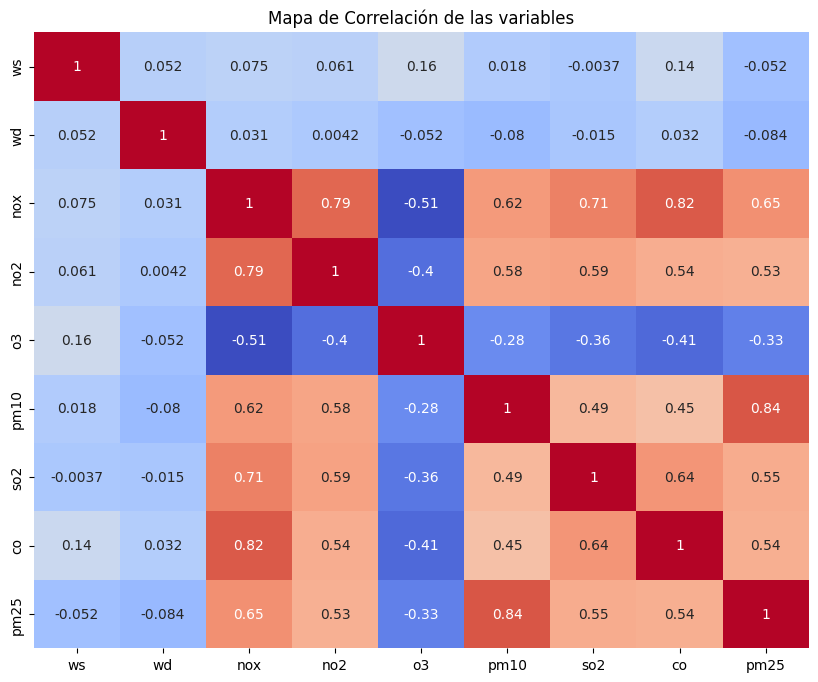

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Mapa de Correlación de las variables')
plt.show()

Se puede observar que existe cierta correlacion entre las variables independientes.

Esto es un indicador de que puede ser adecuado utilizar metodos de imputacion multiple.

Hasta ahora hemos separado las columnas manualmente ya que estamos trabajando con pocos datos.

Con grandes bases de datos en los que se entremezclen datos numéricos con otro tipo de datos puede generar problemas.
Por ello podemos separarlos en funcion de su tipologia.

Para utilizar fancyimpute es necesario instalar su librería ejecutando `pip install fancyimpute`

> En caso de que este código genere problemas al ejecutarse en local ir a anaconda Promt y escribir<br>
1. `conda install ecos`  
2. `conda install CVXcanon`  
3. `pip install fancyimpute`  
>
>En caso de que siga generando problemas analizar las dependencias adicionales exigidas, en mi caso fue ipykernel
`pip install ipykernel`
y despues: `pip install fancyimpute`

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=e776d7b60a794ee46cce246d036a61ac642616ebd496fd0e5f1a0ac0db007a72
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=f2c9cc33b8f66f31d72914a7f5554699063c6a66c8b7a1e9b1d2174d6e42ec13
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


## MICE Multiple Imputation by Chained Equation
MICE utiliza imputación múltiple en lugar de imputación única, lo que genera incertidumbre estadística. MICE realiza regresión múltiple sobre los datos de muestra y toma promedios de ellos.

In [ ]:
data = cargar_datos()

In [ ]:
import pandas as pd
import numpy as np
from fancyimpute import IterativeImputer


datoNum = data.select_dtypes(include=[float])
datoNumGuardar = data.select_dtypes(include=[float])
fecha = data.select_dtypes(include=[object])

# Convertir a matrices numpy
datoNum = datoNum.to_numpy()

# Imputar valores faltantes usando IterativeImputer
imputer = IterativeImputer()
datoNumcomp = imputer.fit_transform(datoNum)

# Crear DataFrames con los datos imputados
datoNumcomp = pd.DataFrame(datoNumcomp)
fecha = pd.DataFrame(fecha)

# Concatenar los DataFrames
datos_completos = pd.concat([fecha, datoNumcomp], axis=1)

# Establecer los nombres de las columnas e índices
datos_completos.columns = data.columns
datos_completos.index = data.index

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [ ]:
# Mostrar el DataFrame completo
datos_completos

date    ws     wd         nox         no2         o3  pm10  \
0      01/01/1998 00:00  0.60  280.0  285.000000   39.000000   1.000000  29.0   
1      01/01/1998 01:00  2.16  230.0  183.063580   49.893889   5.497856  37.0   
2      01/01/1998 02:00  2.76  190.0  654.162185   76.495987   3.000000  34.0   
3      01/01/1998 03:00  2.16  170.0  493.000000   52.000000   3.000000  35.0   
4      01/01/1998 04:00  2.40  180.0  468.000000   78.000000   2.000000  34.0   
...                 ...   ...    ...         ...         ...        ...   ...   
65528  23/06/2005 08:00  1.50  260.0  388.000000  145.000000   6.000000  48.0   
65529  23/06/2005 09:00  1.50  210.0  404.000000  168.000000   7.000000  58.0   
65530  23/06/2005 10:00  2.60  240.0  387.000000  175.000000  10.000000  55.0   
65531  23/06/2005 11:00  3.10  220.0  312.000000  125.000000  15.000000  52.0   
65532  23/06/2005 12:00  3.10  220.0  287.000000  119.000000  17.000000  55.0   

             so2         co       pm25  
0       4.722500   3.372500  25.097028  
1       4.979772   1.392295  23.666362  
2       6.830000   9.602500  37.450249  
3       7.662500  10.217500  37.218635  
4       8.070000   8.912500  33.520300  
...          ...        ...        ...  
65528   9.403824   1.637931  26.000000  
65529  10.183623   1.293103  34.000000  
65530  10.013117   1.293103  34.000000  
65531   8.148352   1.293103  33.000000  
65532   7.836170   1.293103  35.000000  

[65533 rows x 10 columns]

In [ ]:
datos_completos.isnull().any().any()

np.False_

In [ ]:
datoNumGuardar.tail(10)

ws     wd    nox    no2    o3  pm10  so2        co  pm25
65523  1.5  220.0  130.0   59.0   4.0  21.0  NaN  0.689655  15.0
65524  1.0  240.0  158.0   68.0   4.0  28.0  NaN  0.689655  18.0
65525  1.0  180.0  163.0   71.0   4.0  66.0  NaN  0.689655  17.0
65526  1.0  170.0  229.0   83.0   5.0  32.0  NaN  0.862069  21.0
65527  1.5  250.0  404.0  156.0   4.0  49.0  NaN  1.810345  28.0
65528  1.5  260.0  388.0  145.0   6.0  48.0  NaN  1.637931  26.0
65529  1.5  210.0  404.0  168.0   7.0  58.0  NaN  1.293103  34.0
65530  2.6  240.0  387.0  175.0  10.0  55.0  NaN  1.293103  34.0
65531  3.1  220.0  312.0  125.0  15.0  52.0  NaN  1.293103  33.0
65532  3.1  220.0  287.0  119.0  17.0  55.0  NaN  1.293103  35.0

In [ ]:
datos_completos.tail(10)

date   ws     wd    nox    no2    o3  pm10        so2  \
65523  23/06/2005 03:00  1.5  220.0  130.0   59.0   4.0  21.0   3.839823   
65524  23/06/2005 04:00  1.0  240.0  158.0   68.0   4.0  28.0   4.481134   
65525  23/06/2005 05:00  1.0  180.0  163.0   71.0   4.0  66.0   4.543219   
65526  23/06/2005 06:00  1.0  170.0  229.0   83.0   5.0  32.0   5.856306   
65527  23/06/2005 07:00  1.5  250.0  404.0  156.0   4.0  49.0   9.985707   
65528  23/06/2005 08:00  1.5  260.0  388.0  145.0   6.0  48.0   9.403824   
65529  23/06/2005 09:00  1.5  210.0  404.0  168.0   7.0  58.0  10.183623   
65530  23/06/2005 10:00  2.6  240.0  387.0  175.0  10.0  55.0  10.013117   
65531  23/06/2005 11:00  3.1  220.0  312.0  125.0  15.0  52.0   8.148352   
65532  23/06/2005 12:00  3.1  220.0  287.0  119.0  17.0  55.0   7.836170   

             co  pm25  
65523  0.689655  15.0  
65524  0.689655  18.0  
65525  0.689655  17.0  
65526  0.862069  21.0  
65527  1.810345  28.0  
65528  1.637931  26.0  
65529  1.293103  34.0  
65530  1.293103  34.0  
65531  1.293103  33.0  
65532  1.293103  35.0

In [ ]:
data = cargar_datos_temp()

In [ ]:
# Mostrar el DataFrame completo
datos_completos

date    ws     wd         nox         no2         o3  pm10  \
0      01/01/1998 00:00  0.60  280.0  285.000000   39.000000   1.000000  29.0   
1      01/01/1998 01:00  2.16  230.0  183.063580   49.893889   5.497856  37.0   
2      01/01/1998 02:00  2.76  190.0  654.162185   76.495987   3.000000  34.0   
3      01/01/1998 03:00  2.16  170.0  493.000000   52.000000   3.000000  35.0   
4      01/01/1998 04:00  2.40  180.0  468.000000   78.000000   2.000000  34.0   
...                 ...   ...    ...         ...         ...        ...   ...   
65528  23/06/2005 08:00  1.50  260.0  388.000000  145.000000   6.000000  48.0   
65529  23/06/2005 09:00  1.50  210.0  404.000000  168.000000   7.000000  58.0   
65530  23/06/2005 10:00  2.60  240.0  387.000000  175.000000  10.000000  55.0   
65531  23/06/2005 11:00  3.10  220.0  312.000000  125.000000  15.000000  52.0   
65532  23/06/2005 12:00  3.10  220.0  287.000000  119.000000  17.000000  55.0   

             so2         co       pm25  
0       4.722500   3.372500  25.097028  
1       4.979772   1.392295  23.666362  
2       6.830000   9.602500  37.450249  
3       7.662500  10.217500  37.218635  
4       8.070000   8.912500  33.520300  
...          ...        ...        ...  
65528   9.403824   1.637931  26.000000  
65529  10.183623   1.293103  34.000000  
65530  10.013117   1.293103  34.000000  
65531   8.148352   1.293103  33.000000  
65532   7.836170   1.293103  35.000000  

[65533 rows x 10 columns]

In [ ]:
# dir(imputer)
imputer._get_param_names()
# imputer._get_tags()

['add_indicator',
 'estimator',
 'fill_value',
 'imputation_order',
 'initial_strategy',
 'keep_empty_features',
 'max_iter',
 'max_value',
 'min_value',
 'missing_values',
 'n_nearest_features',
 'random_state',
 'sample_posterior',
 'skip_complete',
 'tol',
 'verbose']

In [ ]:
datos_completos.tail(10)

date   ws     wd    nox    no2    o3  pm10        so2  \
65523  23/06/2005 03:00  1.5  220.0  130.0   59.0   4.0  21.0   3.839823   
65524  23/06/2005 04:00  1.0  240.0  158.0   68.0   4.0  28.0   4.481134   
65525  23/06/2005 05:00  1.0  180.0  163.0   71.0   4.0  66.0   4.543219   
65526  23/06/2005 06:00  1.0  170.0  229.0   83.0   5.0  32.0   5.856306   
65527  23/06/2005 07:00  1.5  250.0  404.0  156.0   4.0  49.0   9.985707   
65528  23/06/2005 08:00  1.5  260.0  388.0  145.0   6.0  48.0   9.403824   
65529  23/06/2005 09:00  1.5  210.0  404.0  168.0   7.0  58.0  10.183623   
65530  23/06/2005 10:00  2.6  240.0  387.0  175.0  10.0  55.0  10.013117   
65531  23/06/2005 11:00  3.1  220.0  312.0  125.0  15.0  52.0   8.148352   
65532  23/06/2005 12:00  3.1  220.0  287.0  119.0  17.0  55.0   7.836170   

             co  pm25  
65523  0.689655  15.0  
65524  0.689655  18.0  
65525  0.689655  17.0  
65526  0.862069  21.0  
65527  1.810345  28.0  
65528  1.637931  26.0  
65529  1.293103  34.0  
65530  1.293103  34.0  
65531  1.293103  33.0  
65532  1.293103  35.0

In [ ]:
datoNumGuardar.tail(10)

ws     wd    nox    no2    o3  pm10  so2        co  pm25
65523  1.5  220.0  130.0   59.0   4.0  21.0  NaN  0.689655  15.0
65524  1.0  240.0  158.0   68.0   4.0  28.0  NaN  0.689655  18.0
65525  1.0  180.0  163.0   71.0   4.0  66.0  NaN  0.689655  17.0
65526  1.0  170.0  229.0   83.0   5.0  32.0  NaN  0.862069  21.0
65527  1.5  250.0  404.0  156.0   4.0  49.0  NaN  1.810345  28.0
65528  1.5  260.0  388.0  145.0   6.0  48.0  NaN  1.637931  26.0
65529  1.5  210.0  404.0  168.0   7.0  58.0  NaN  1.293103  34.0
65530  2.6  240.0  387.0  175.0  10.0  55.0  NaN  1.293103  34.0
65531  3.1  220.0  312.0  125.0  15.0  52.0  NaN  1.293103  33.0
65532  3.1  220.0  287.0  119.0  17.0  55.0  NaN  1.293103  35.0

In [ ]:
imputer.get_params()

{'add_indicator': False,
 'estimator': None,
 'fill_value': None,
 'imputation_order': 'ascending',
 'initial_strategy': 'mean',
 'keep_empty_features': False,
 'max_iter': 10,
 'max_value': inf,
 'min_value': -inf,
 'missing_values': nan,
 'n_nearest_features': None,
 'random_state': None,
 'sample_posterior': False,
 'skip_complete': False,
 'tol': 0.001,
 'verbose': 0}

# 📋 Resumen de Técnicas de Tratamiento de Valores Perdidos

## 🔍 **Técnicas de Detección y Análisis**
- **`data.isnull()`** - Detectar valores perdidos
- **`data.isnull().sum()`** - Contar valores perdidos por columna
- **`missingno.matrix()`** - Matriz visual de valores perdidos
- **`sns.heatmap(data.isnull())`** - Mapa de calor de valores perdidos
- **Análisis de correlación de missingness** - Entender patrones

## 🗑️ **Técnicas de Eliminación**
- **`data.dropna()`** - Eliminar filas con valores perdidos
- **Ventajas:** Simple y directo
- **Desventajas:** Pérdida de información, rompe series temporales

## 🔧 **Técnicas de Imputación Simple**
- **`data.fillna(valor)`** - Rellenar con valor constante
- **`data.fillna(data.mean())`** - Rellenar con media
- **`SimpleImputer(strategy='mean')`** - Imputación con media
- **`SimpleImputer(strategy='median')`** - Imputación con mediana
- **`SimpleImputer(strategy='most_frequent')`** - Imputación con moda

## ⏰ **Técnicas para Series Temporales**
- **`data.ffill()`** - Forward fill (valor anterior)
- **`data.bfill()`** - Backward fill (valor posterior)
- **`data.interpolate(method='linear')`** - Interpolación lineal
- **Ventajas:** Respeta orden temporal
- **Uso:** Ideal para datos con componente temporal

## 🧠 **Técnicas de Imputación Avanzada**
- **MICE (Multiple Imputation by Chained Equations)**
  - `IterativeImputer()` de scikit-learn
  - Utiliza relaciones entre variables
  - Genera múltiples imputaciones
- **Estrategias personalizadas**
  - Funciones definidas por el usuario
  - Basadas en relaciones específicas entre variables

## 📊 **Recomendaciones por Tipo de Dato**

### Variables Numéricas
1. **Pocos valores perdidos (<5%)**: Media o mediana
2. **Muchos valores perdidos (>20%)**: MICE o eliminación
3. **Series temporales**: Forward/Backward fill o interpolación
4. **Variables correlacionadas**: MICE

### Variables Categóricas
1. **Moda** para valores frecuentes
2. **Categoría "Desconocido"** para preservar información
3. **MICE** si hay correlaciones con otras variables

## ⚠️ **Consideraciones Importantes**
- **Analizar el patrón de missingness** antes de decidir
- **Evaluar el impacto** en la distribución de datos
- **Considerar el contexto del negocio** y dominio
- **Validar resultados** con métricas apropiadas
- **Documentar decisiones** tomadas

## 🎯 **Flujo de Trabajo Recomendado**
1. **Explorar** patrones de valores perdidos
2. **Visualizar** la missingness
3. **Analizar** correlaciones y relaciones
4. **Seleccionar** técnica apropiada
5. **Implementar** y validar
6. **Comparar** resultados con datos originales
7. **Documentar** proceso y decisiones